In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/Users/abhinavgarg/Projects/Data-Science/stage4/data/mergedTuples.csv")

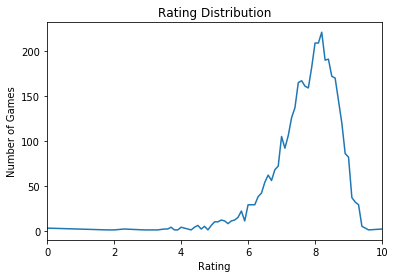

In [3]:
# Rating Distribution
df.groupby(['lRating'])['lRating'].agg(['count']).plot(legend=False)
plt.xlabel('Rating')
plt.ylabel('Number of Games')
plt.title('Rating Distribution')
# plt.savefig('rating_games.png',dpi=300,bbox_inches='tight')
plt.show()

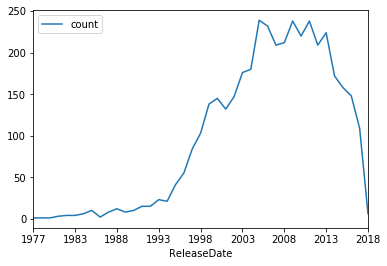

In [4]:
# Game Distribution by year
df2 = df.copy(deep=True)
df2['ReleaseDate'] = df2['ReleaseDate'].str.slice(0,4)
df2.groupby(['ReleaseDate'])['ltable_ID'].agg(['count']).plot()
plt.show()

{'PlayStation': 2476, 'PC': 2201, 'Nintendo': 1238, 'Macintosh': 749, 'Linux': 362, 'Xbox': 1713, 'Mobile': 546, 'Wii': 619, 'Other': 412, 'Sega': 228, 'Commodore': 55, 'Atari': 34, 'Neo Geo': 18}


Text(0.5,1,'Platform wise game distribution')

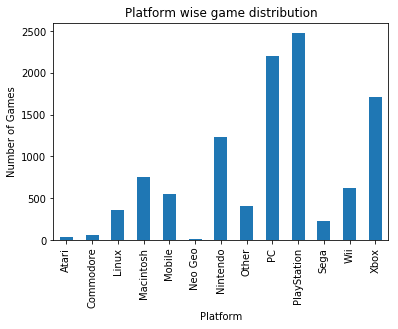

In [5]:
# Game Distribution by platform
platCountDict = dict()
for plat in df['Platform']:
    for p in plat.split('|'):
        if p not in platCountDict.keys():
            platCountDict[p]=0
        platCountDict[p] +=1
print(platCountDict)
chartDict = list()
for k in sorted(platCountDict.keys()):
    chartDict.append([k,platCountDict[k]])
pd.DataFrame(chartDict, columns=['Platform', 'Count']).plot(x='Platform',y='Count',kind='bar',legend=False)
plt.xlabel('Platform')
plt.ylabel('Number of Games')
plt.title('Platform wise game distribution')
# plt.savefig('platfrom_wise_games.png',dpi=300,bbox_inches='tight')

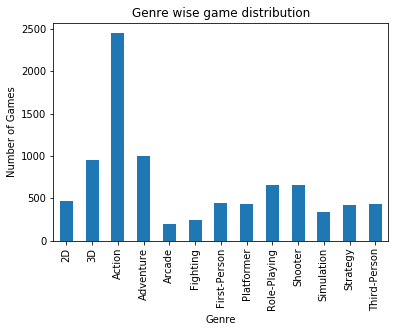

In [6]:
# Game Distribution by Genre
pubCountDict = dict()
for plat in df['Genre']:
    for p in plat.split('|'):
        if p not in pubCountDict.keys():
            pubCountDict[p]=0
        pubCountDict[p] +=1
pubCountDF = pd.DataFrame(list(pubCountDict.items()), columns=['Genre', 'Count'])
pubCountDF.head()
pubCountDF[(pubCountDF['Count']>200) & (pubCountDF['Genre']!='Platform')].sort_values(by='Genre').plot(x='Genre',kind='bar',legend=False)
plt.title("Genre wise game distribution")
plt.ylabel("Number of Games")
plt.xlabel("Genre")
# plt.savefig('genre_wise_games.png',dpi=300,bbox_inches='tight')
plt.show()


In [7]:
# Publishers with max game published in a year
yearPubCount = dict()
for _,row in df.iterrows():
    year = row['ReleaseDate'][0:4]
    data_list = row['Publisher'].split('|')
    if year not in yearPubCount.keys():
        yearPubCount[year] = {'Dummy':0}
    for d in data_list:
        if d not in yearPubCount[year].keys():
            yearPubCount[year][d]=0
        yearPubCount[year][d]+=1

chartDict = list()
for kYear in sorted(yearPubCount.keys()):
    maxPub = 0
    for kData in yearPubCount[kYear].keys():
        maxPub = max(maxPub,yearPubCount[kYear][kData])
    listData = list()
    for kData in yearPubCount[kYear].keys():
        if yearPubCount[kYear][kData]==maxPub:
            listData.append(kData)
    chartDict.append([kYear,maxPub,','.join(sorted(listData))])
        
chartDF = pd.DataFrame(chartDict, columns=['Year', 'Count','Publisher'])
print(chartDF)

    Year  Count                                          Publisher
0   1977      1  Atari,Bally Midway,Bootleg,Bug-Byte,Gradiente,...
1   1979      1  Accolade,Atari,Atari Corporation,Bootleg,Polyv...
2   1980      1  Acclaim,Atari,Atari Corporation,AtariSoft,Band...
3   1981      2                     Atari Corporation,Bootleg,Sega
4   1982      3                            Atari,Atari Corporation
5   1983      3                                              Atari
6   1984      4                                           Nintendo
7   1985      5                                            Hamster
8   1986      2                                            Hamster
9   1987      6                                           Nintendo
10  1988      4                               Konami,Nintendo,Sega
11  1989      6                                           Nintendo
12  1990      4                                           Nintendo
13  1991      7                                           Nint

Text(0.5,1,'Yearly games release on top platforms')

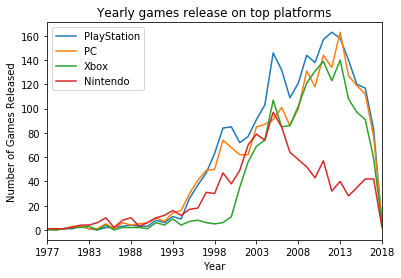

In [8]:
# Year wise games release on top platforms
yearPubCount = dict()
for _,row in df.iterrows():
    year = row['ReleaseDate'][0:4]
    data_list = row['Platform'].split('|')
    if year not in yearPubCount.keys():
        yearPubCount[year] = {'Dummy':0}
    for d in data_list:
        if d not in yearPubCount[year].keys():
            yearPubCount[year][d]=0
        yearPubCount[year][d]+=1

chartData = list()
for kYear in sorted(yearPubCount.keys()):
    chartData.append([kYear,yearPubCount[kYear].get('PlayStation',0),yearPubCount[kYear].get('PC',0),yearPubCount[kYear].get('Xbox',0),yearPubCount[kYear].get('Nintendo',0)])
chartDF = pd.DataFrame(chartData, columns=['Year', 'PlayStation','PC','Xbox','Nintendo'])
chartDF.plot(x='Year')
plt.xlabel('Year')
plt.ylabel('Number of Games Released')
plt.title('Yearly games release on top platforms')
# plt.savefig('year_platfrom_games.png',dpi=300)

In [9]:
# Top studios producing hit games

pubCountDict = dict()
pubRatingDict = dict()

for _,row in df.iterrows():
    year = row['ReleaseDate'][0:4]
    if year <'2000':
        continue
    if float(row['lRating']) < 9.0:
        continue
    plat = row['Publisher']
# for plat in df['Publisher']:
    
    for p in plat.split('|'):
        if p not in pubCountDict.keys():
            pubCountDict[p]=0
            pubRatingDict[p]=0
        pubCountDict[p] +=1
        pubRatingDict[p] +=float(row['lRating'])

chartRatinglist = list()
for k in pubCountDict.keys():
    chartRatinglist.append([k,pubCountDict[k],float(pubRatingDict[k])/pubCountDict[k]])

pubCountDF = pd.DataFrame(chartRatinglist, columns=['Publisher', 'Number of Games','avg_rating'])
# pubCountDF[(pubCountDF['count']>5)].sort_values(by='avg_rating',ascending=False).head(10)
pubCountDF[['Publisher', 'Number of Games']].sort_values(by='Number of Games',ascending=False).head(10)

,Publisher,Number of Games
8,Nintendo,45
26,SCEA,20
3,Square Enix,19
42,SCEE,18
19,Capcom,16
43,SCE Australia,15
47,SCEI,14
0,Konami,12
48,Sony Computer Entertainment,12
44,Microsoft Game Studios,11
